In [1]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T

In [2]:
from neural_stylization.transfer_style import Stylizer
from neural_stylization.optimizers import GradientDescent, Adam, L_BFGS
from neural_stylization.util.build_callback import build_callback

In [3]:
ITERATIONS = 3

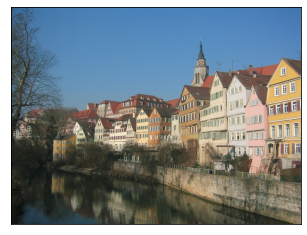

In [4]:
content = io.imread('img/content/tubingen.jpg')
ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

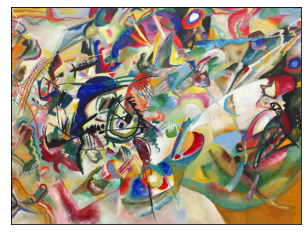

In [5]:
style = io.imread('img/styles/composition-vii.jpg')
style = T.resize(style, content.shape[:-1], preserve_range=True).astype('uint8')
ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

In [6]:
def stylize(iterations: int, style_layer_names: str):
    """
    Stylize the image.
    
    Args:
        iterations: the number of iterations to optimize
        style_layer_names: the name of the style layers to use
        
    Returns: a stylized image
    """
    # create a stylization algorithm
    sty = Stylizer(content_weight=1, style_weight=1e4, style_layer_names=style_layer_names)
    # create directories for build artifacts
    build_dir = 'build/style-layer-selection/{}'.format(style_layer_names[-1])
    # create an optimizer for the stylizer
    adam = Adam(learning_rate=1e2)
    # run the stlization algorithm and store the result
    img = sty(
        content=content,
        style=style,
        optimize=adam,
        iterations=iterations,
        callback=build_callback(build_dir)
    )
    io.imsave('img/layer-style/{}.png'.format(style_layer_names[-1]), img)

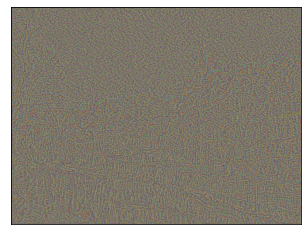

100%|██████████| 3/3 [00:12<00:00,  4.30s/it]


In [7]:
stylize(ITERATIONS, ['block1_conv1'])

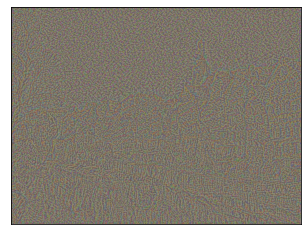

100%|██████████| 3/3 [00:04<00:00,  1.42s/it]


In [8]:
stylize(ITERATIONS, ['block1_conv1', 'block2_conv1'])

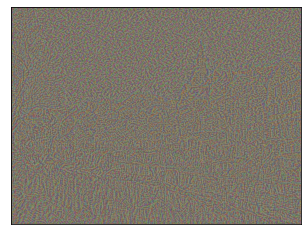

100%|██████████| 3/3 [00:04<00:00,  1.39s/it]


In [9]:
stylize(ITERATIONS, ['block1_conv1', 'block2_conv1', 'block3_conv1'])

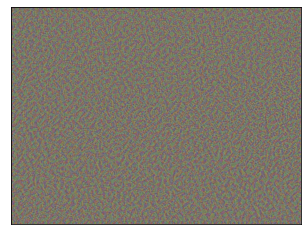

100%|██████████| 3/3 [00:04<00:00,  1.41s/it]


In [10]:
stylize(ITERATIONS, ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1'])

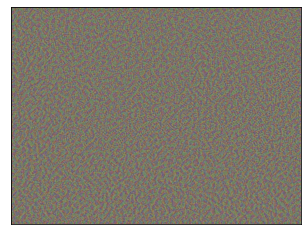

100%|██████████| 3/3 [00:05<00:00,  1.70s/it]


In [11]:
stylize(ITERATIONS, ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])